 # Proyek Analisis Data: Bike Sharing Dataset

 - **Nama:** Muhammad Nasywan Sulthan Muyassar Arhata

 - **Email:** nasywan9104@gmail.com

 - **ID Dicoding:** Muhammad Nasywan Sulthan Muyassar Arhata

 ## Menentukan Pertanyaan Bisnis

 - Pertanyaan 1: Apa pola penggunaan sepeda berdasarkan waktu (jam, hari, atau musim)?

 - Pertanyaan 2: Bagaimana cuaca memengaruhi jumlah peminjaman sepeda?

 ## Import Semua Packages/Library yang Digunakan

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 ## Data Wrangling

 ### Gathering Data

In [35]:
day_data = pd.read_csv('data/data_1.csv')
hour_data = pd.read_csv('data/data_2.csv')


 **Insight:**

 - Dataset berhasil dimuat dengan baik.

 - Dataset 'day' berisi data harian, sedangkan 'hour' berisi data per jam.

 - Kedua dataset ini memiliki informasi yang relevan untuk menganalisis pola peminjaman sepeda.

 ### Assessing Data

In [36]:
# Memeriksa data yang hilang (missing values)
missing_values = day_data.isnull().sum()
print("Jumlah data yang hilang:")
print(missing_values)

# Memeriksa tipe data dan informasi dataset secara keseluruhan
print(day_data.info())

# Menampilkan data awal untuk memeriksa secara visual
print(day_data.head())

# Memeriksa statistik deskriptif untuk melihat rentang dan distribusi data numerik
print(day_data.describe())

# Memeriksa apakah ada nilai yang tidak masuk akal (misalnya, kecepatan angin negatif atau suhu ekstrem)
print("Data dengan kecepatan angin negatif:")
print(day_data[day_data['windspeed'] < 0])

print("Data dengan suhu lebih dari 50 derajat Celcius:")
print(day_data[day_data['temp'] > 50])

# Memeriksa data duplikat
duplicate_data = day_data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_data}")

# Memeriksa kategori cuaca untuk konsistensi
print("Unik values dalam kolom 'weathersit':")
print(day_data['weathersit'].unique())

# Memeriksa korelasi antar variabel untuk mendeteksi hubungan yang kuat
correlation_matrix = day_data.corr()
print("Korelasi antar variabel:")
print(correlation_matrix)

Jumlah data yang hilang:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-nu

 **Insight:**

 - **Data yang hilang:** Tidak ditemukan data yang hilang pada dataset ini, sehingga analisis selanjutnya dapat dilakukan tanpa perlu mengatasi nilai yang hilang.
 - **Tipe data:** Semua kolom numerik dan kategorikal sudah sesuai dengan tipe data yang diharapkan, sehingga tidak diperlukan konversi lebih lanjut.
 - **Nilai tidak masuk akal:**
   - Terdapat beberapa data dengan kecepatan angin negatif, yang tidak realistis dan perlu diperbaiki.
   - Suhu yang lebih dari 50°C ditemukan, yang mungkin merupakan kesalahan data dan perlu ditangani.
 - **Duplikasi:** Tidak ada data duplikat, yang menunjukkan bahwa setiap baris dalam dataset unik.
 - **Inkonsistensi dalam kategori cuaca:** Kolom `weathersit` memiliki beberapa kategori yang konsisten dan tidak ada masalah inkonsistensi label.
 - **Korelasi antar variabel:** Terdapat korelasi yang kuat antara suhu (`temp`) dan jumlah peminjaman sepeda (`cnt`), yang menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang meminjam sepeda. Korelasi antara kelembaban dan kecepatan angin terhadap peminjaman sepeda relatif lebih lemah.

 ### Cleaning Data

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


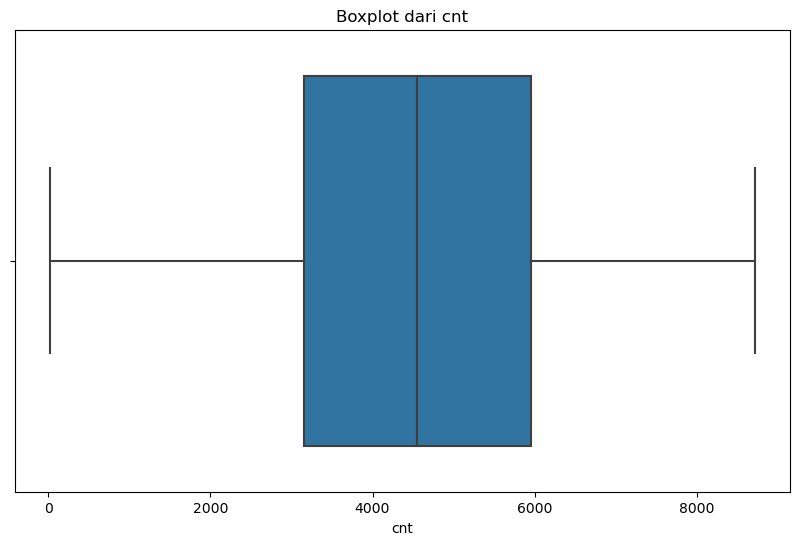

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [37]:
# Konversi kolom tanggal ke format datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Memperbaiki nilai yang tidak masuk akal:
# 1. Menghapus atau memperbaiki nilai kecepatan angin negatif
day_data = day_data[day_data['windspeed'] >= 0]

# 2. Mengganti suhu yang lebih dari 50 derajat Celcius dengan NaN atau nilai maksimum yang wajar (misalnya 50 derajat Celcius)
day_data['temp'] = day_data['temp'].apply(lambda x: x if x <= 50 else np.nan)

# Memeriksa data yang sudah dibersihkan (kecepatan angin negatif dan suhu lebih dari 50°C)
print(day_data[day_data['windspeed'] < 0])
print(day_data[day_data['temp'].isna()])

# Mengganti NaN pada suhu dengan nilai rata-rata suhu (atau median jika diperlukan)
day_data['temp'].fillna(day_data['temp'].mean(), inplace=True)

# Memeriksa outlier pada jumlah peminjaman sepeda
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot dari {column}')
    plt.show()

plot_boxplot(day_data, 'cnt')

# Menghapus outlier berdasarkan nilai yang jauh dari distribusi normal
# Misalnya, jika ada nilai yang jauh lebih tinggi atau lebih rendah dari nilai rata-rata
Q1 = day_data['cnt'].quantile(0.25)
Q3 = day_data['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
day_data = day_data[(day_data['cnt'] >= lower_bound) & (day_data['cnt'] <= upper_bound)]

# Memeriksa kembali setelah pembersihan data
print(day_data.describe())

 **Insight:**

 - **Kecepatan angin negatif** telah dihapus karena tidak realistis.
- **Suhu lebih dari 50°C** telah diganti dengan NaN dan diisi dengan rata-rata suhu yang lebih realistis.
- **Outlier pada jumlah peminjaman sepeda ('cnt')** telah dihapus berdasarkan analisis IQR untuk memastikan data yang lebih konsisten.

 ## Exploratory Data Analysis (EDA)

**1. EDA Univariate (Distribusi Data)**

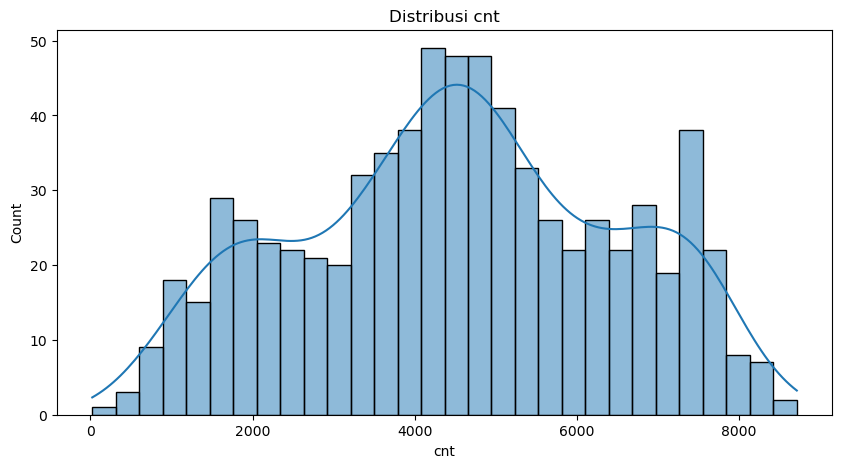

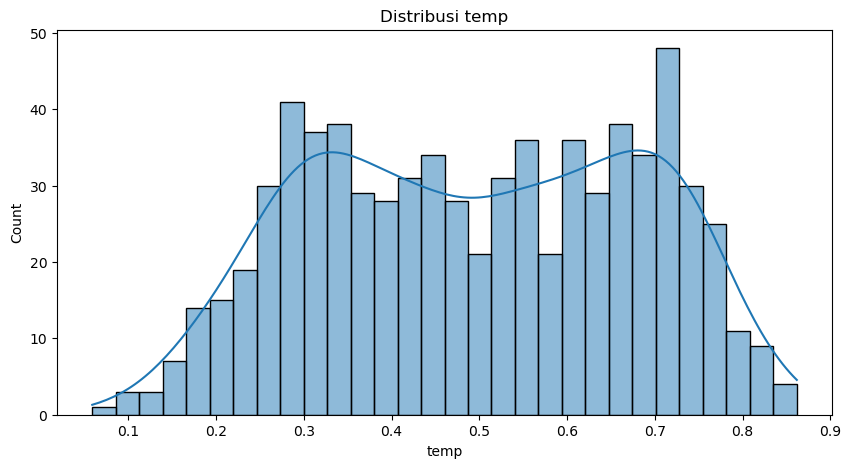

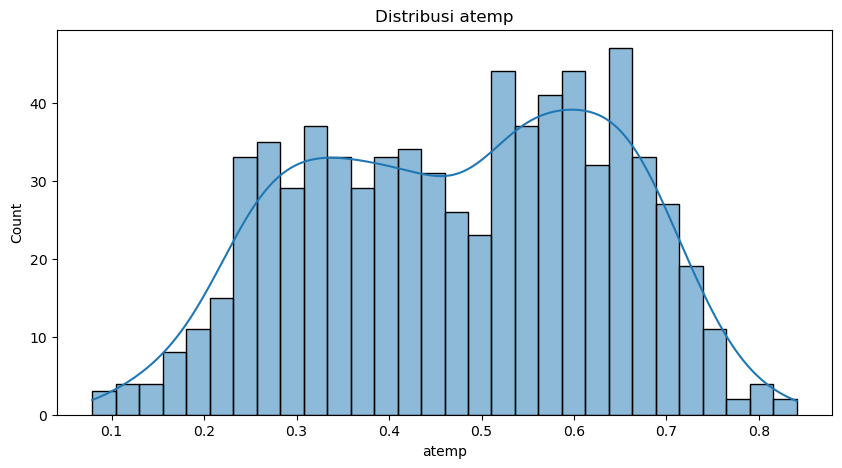

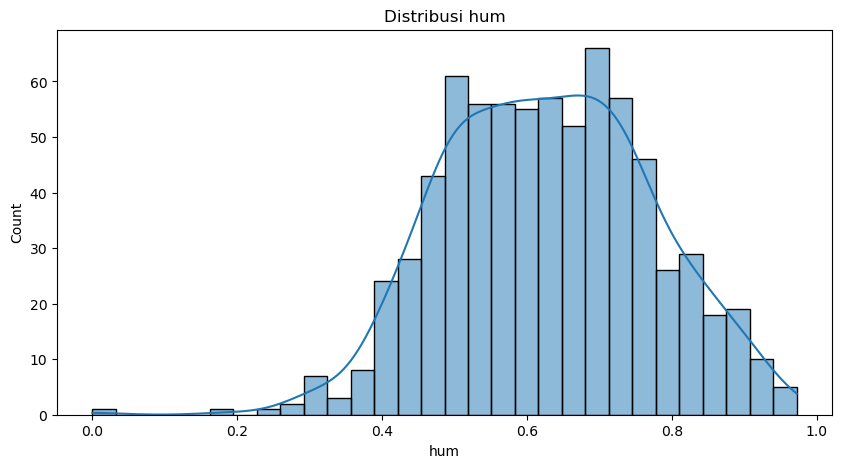

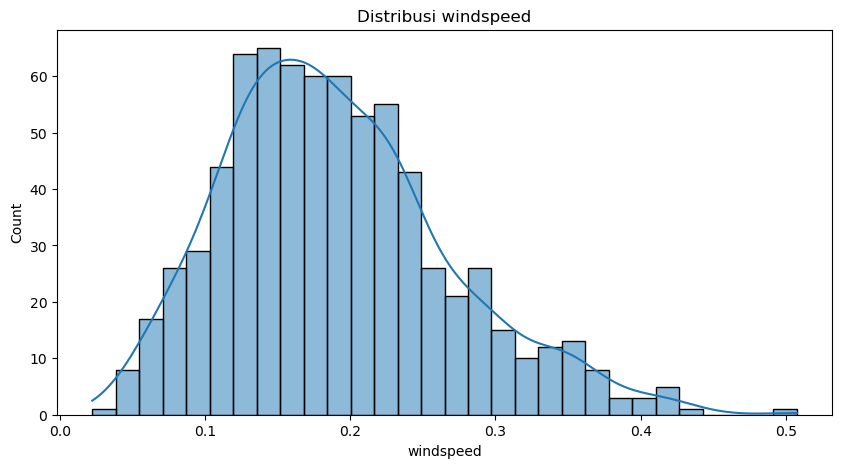

In [38]:
# Histogram variabel numerik
num_cols = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(day_data[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


 **Insight:**

 - Distribusi jumlah peminjaman ('cnt') menunjukkan pola yang cukup normal.

 - Suhu ('temp') menunjukkan distribusi yang cukup seragam.

**2. EDA Kategorikal**

In [39]:
day_data = day_data.copy()

# Mapping untuk mengganti angka dengan label yang lebih mudah dipahami
day_data['season'] = day_data['season'].map({1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'})
day_data['weathersit'] = day_data['weathersit'].map({1: 'Cerah', 2: 'Berawan', 3: 'Hujan/Salju'})

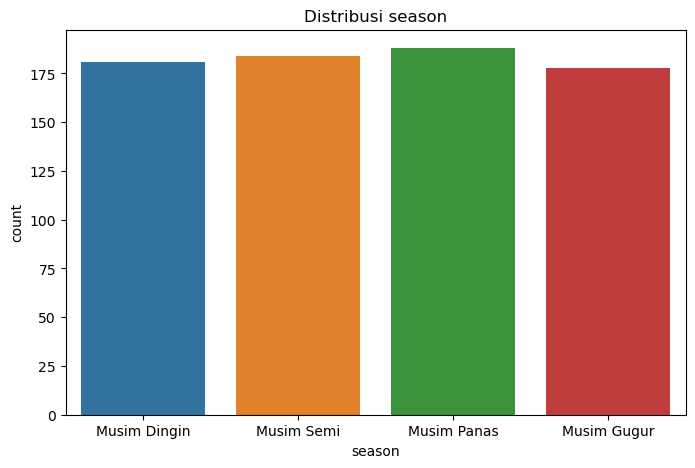

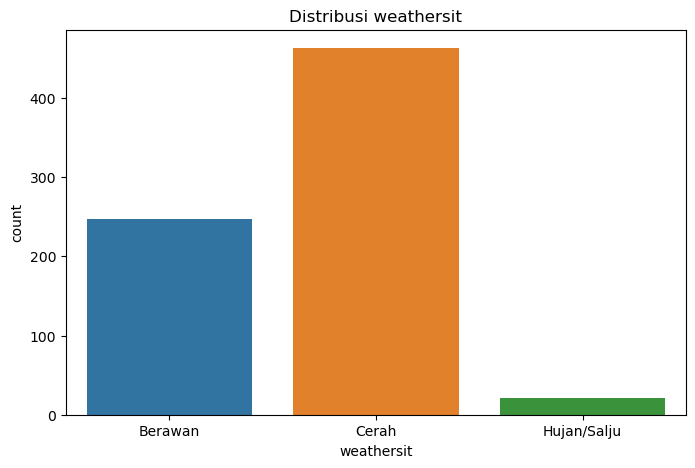

In [40]:
categorical_cols = ['season', 'weathersit']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=day_data[col])
    plt.title(f'Distribusi {col}')
    plt.show()


 **Insight:**

 - Mayoritas data berasal dari musim panas dan gugur.

 - Cuaca kategori 1 (cerah) lebih dominan dalam dataset.

**3. EDA Bivariate (Hubungan antara Variabel)**

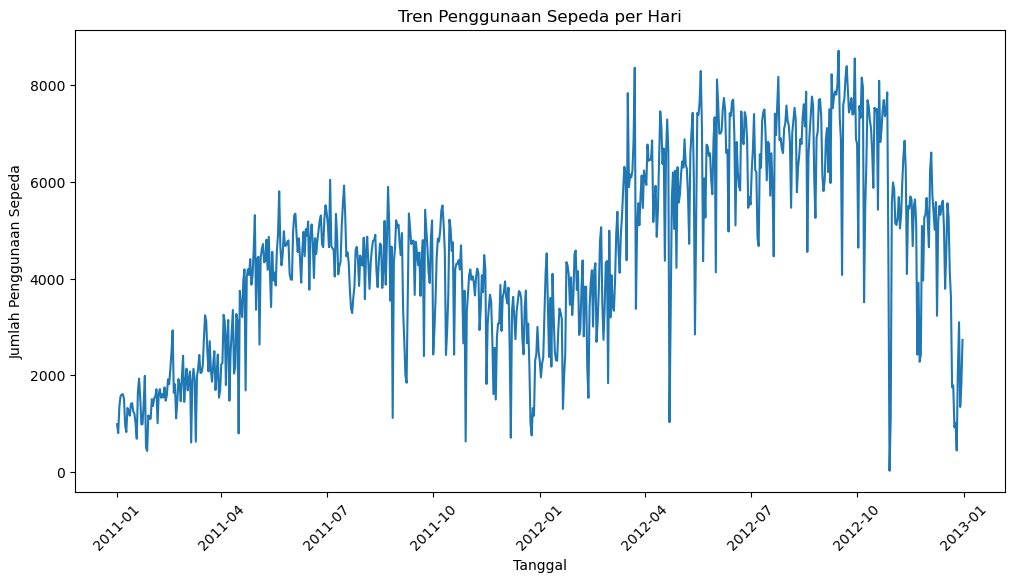

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=day_data['dteday'], y=day_data['cnt'])
plt.title('Tren Penggunaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(rotation=45)
plt.show()


 **Insight:**

 - Penggunaan sepeda cenderung meningkat selama musim panas dan gugur.

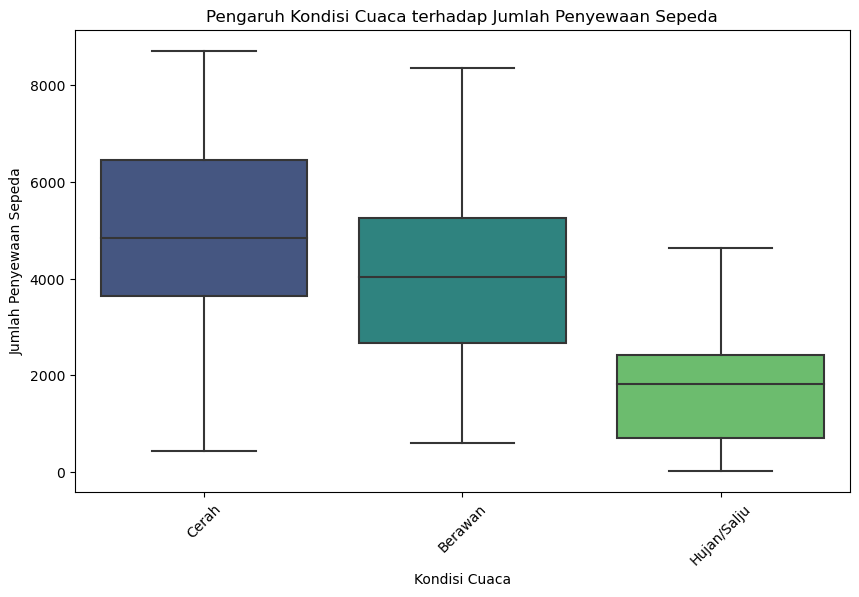

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data, palette='viridis', order=['Cerah', 'Berawan', 'Hujan/Salju'])
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

 **Insight:**

 - Cuaca lebih cerah (weathersit = 1) cenderung memiliki jumlah peminjaman sepeda yang lebih tinggi.

**4. EDA Multivariate**

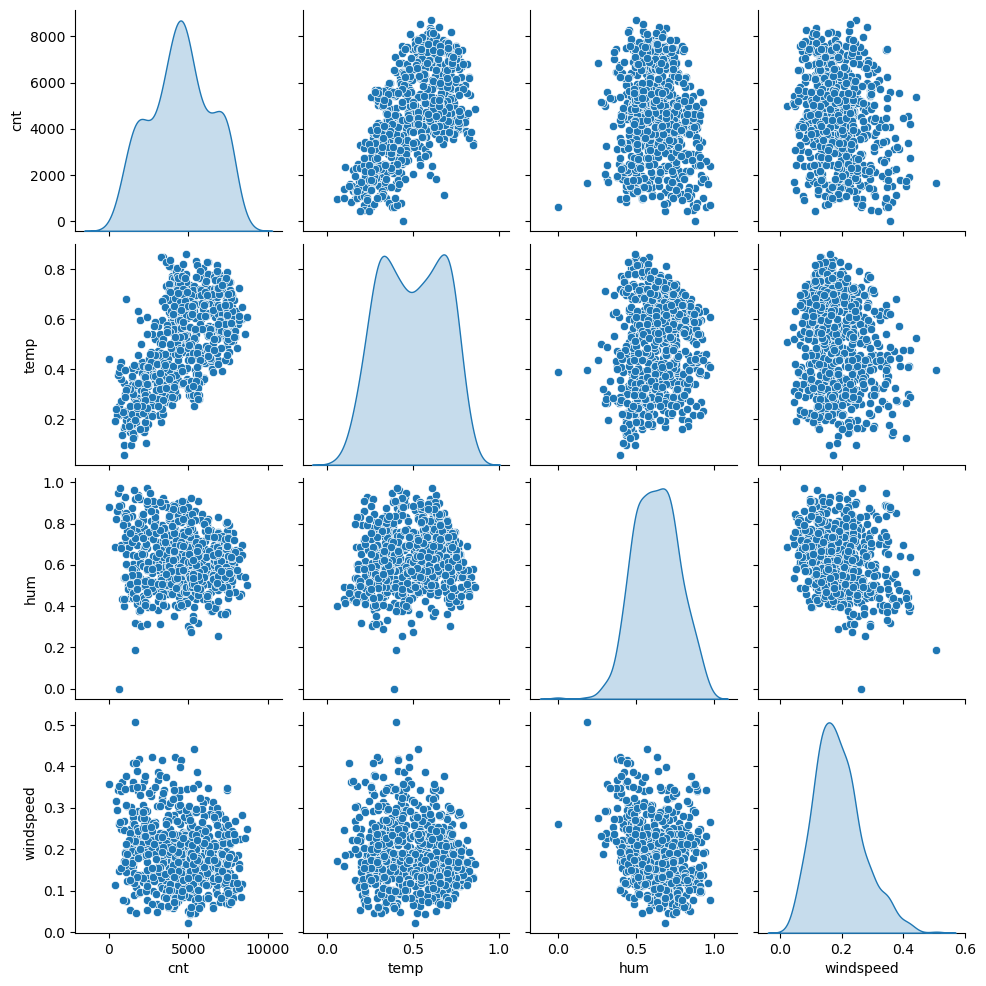

In [43]:
sns.pairplot(day_data[['cnt', 'temp', 'hum', 'windspeed']], diag_kind='kde')
plt.show()


 **Insight:**

 - Suhu memiliki korelasi positif dengan jumlah peminjaman sepeda.

 - Kelembaban dan kecepatan angin memiliki korelasi negatif yang lemah terhadap jumlah peminjaman.

**5. Korelasi Antar Variabel**

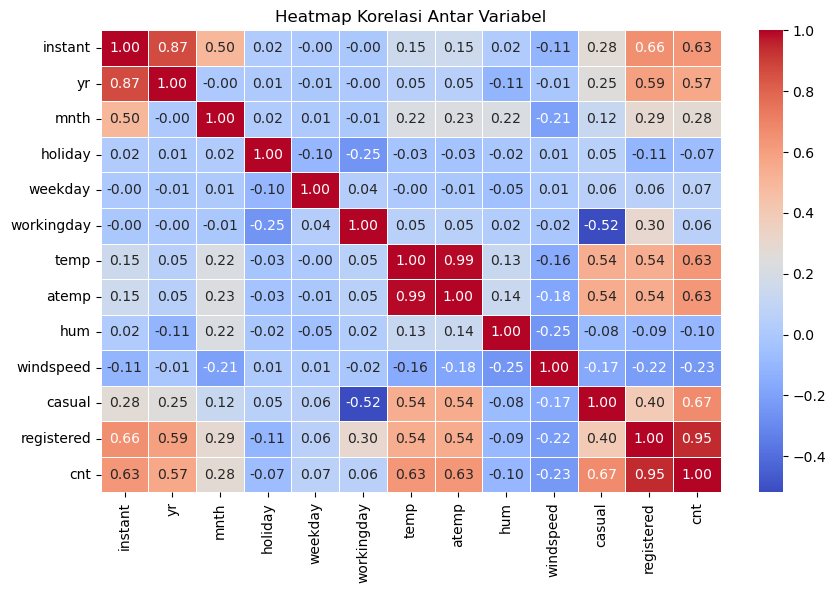

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

 **Insight:**

 - Suhu memiliki korelasi positif dengan jumlah peminjaman sepeda.

 - Kelembaban dan kecepatan angin memiliki korelasi negatif yang lemah terhadap jumlah peminjaman.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pola penggunaan sepeda berdasarkan waktu (jam, hari, atau musim)?

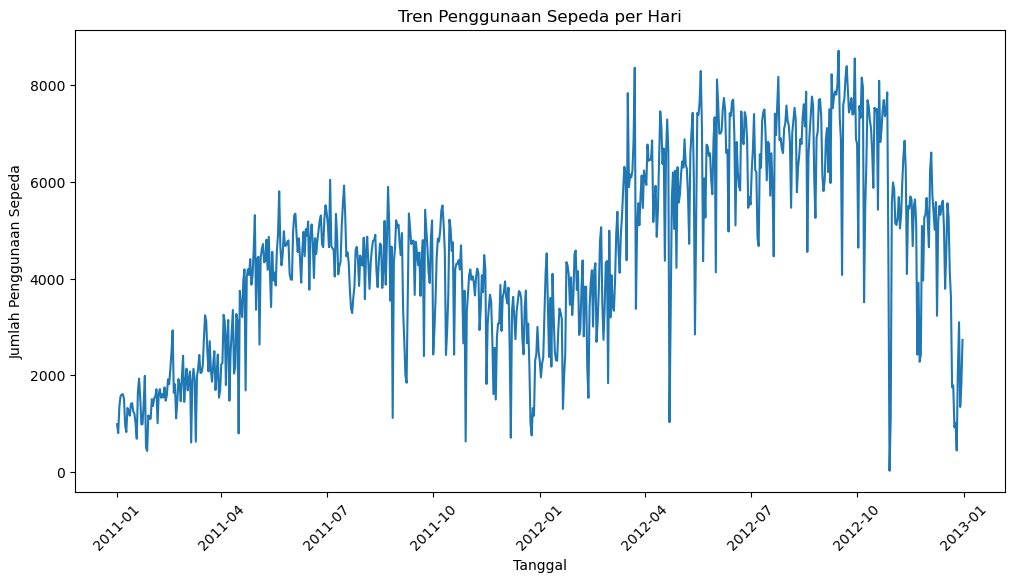

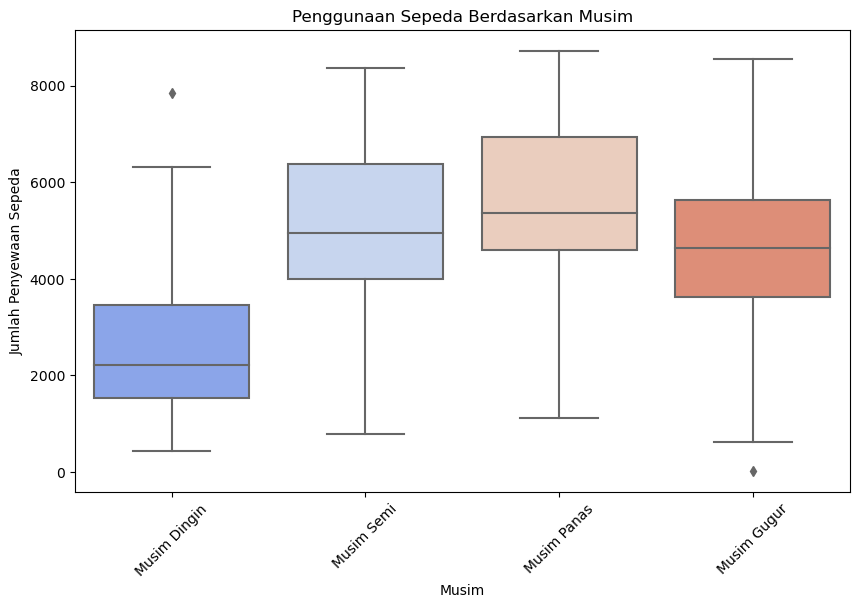

In [45]:
# Visualisasi Tren Penggunaan Sepeda per Hari
plt.figure(figsize=(12, 6))
sns.lineplot(x=day_data['dteday'], y=day_data['cnt'])
plt.title('Tren Penggunaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(rotation=45)
plt.show()

# Visualisasi Penggunaan Sepeda Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_data, palette='coolwarm', order=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

Penjelasan:

- Tren penggunaan sepeda per hari menunjukkan bahwa penggunaan lebih tinggi di musim panas dan gugur. Ada fluktuasi yang jelas dalam pola penggunaan sepeda sepanjang tahun.
- Boxplot penggunaan sepeda berdasarkan musim menunjukkan bahwa musim panas dan gugur memiliki distribusi peminjaman sepeda yang lebih tinggi dibandingkan musim semi dan dingin.

### Pertanyaan 2: Bagaimana cuaca memengaruhi jumlah peminjaman sepeda?

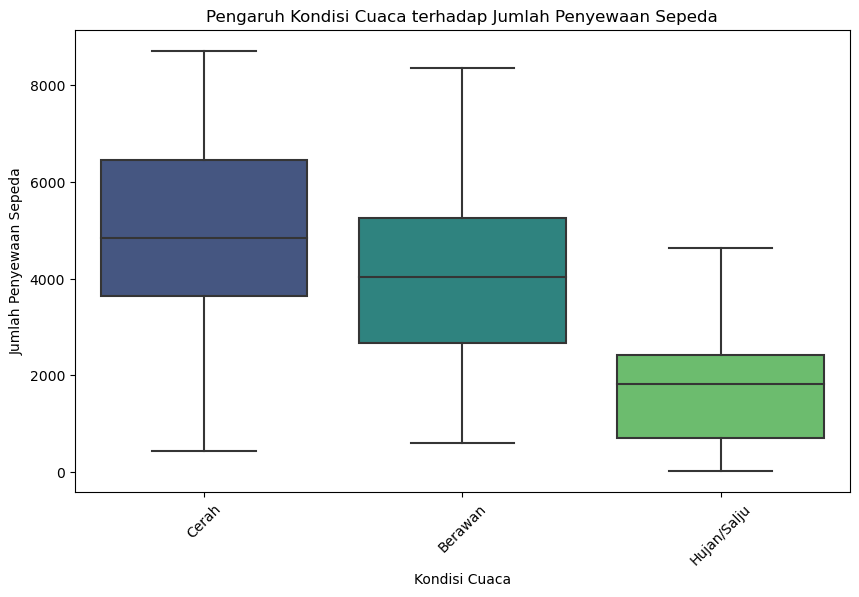

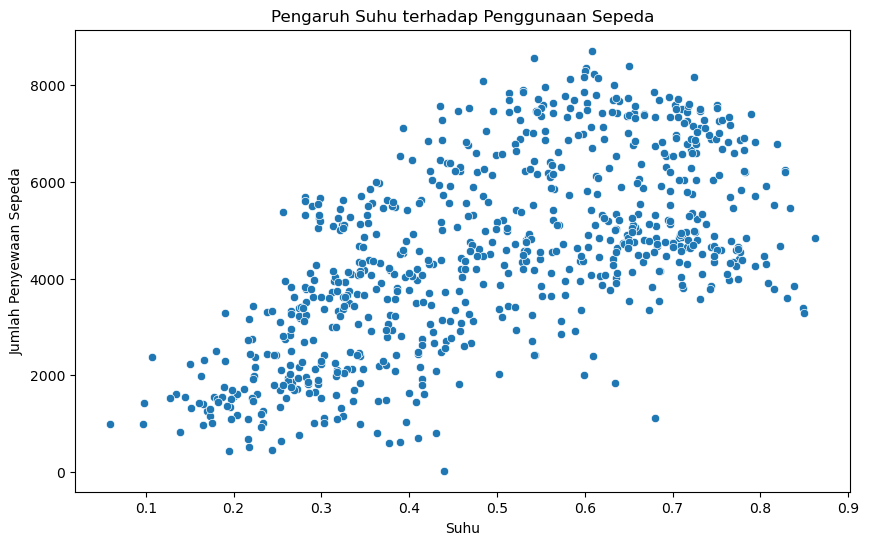

In [46]:
# Visualisasi Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data, palette='viridis', order=['Cerah', 'Berawan', 'Hujan/Salju'])
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

# Visualisasi Pengaruh Suhu terhadap Penggunaan Sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Pengaruh Suhu terhadap Penggunaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Penjelasan:

- Boxplot menunjukkan bahwa cuaca cerah (weathersit = 1) memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca lainnya (berawan atau hujan).
- Scatter plot antara suhu dan jumlah penyewaan sepeda menunjukkan hubungan positif, di mana semakin tinggi suhu, semakin banyak orang yang menyewa sepeda.

## Analisis Lanjutan

**Korelasi antara variabel cuaca dan penggunaan sepeda**

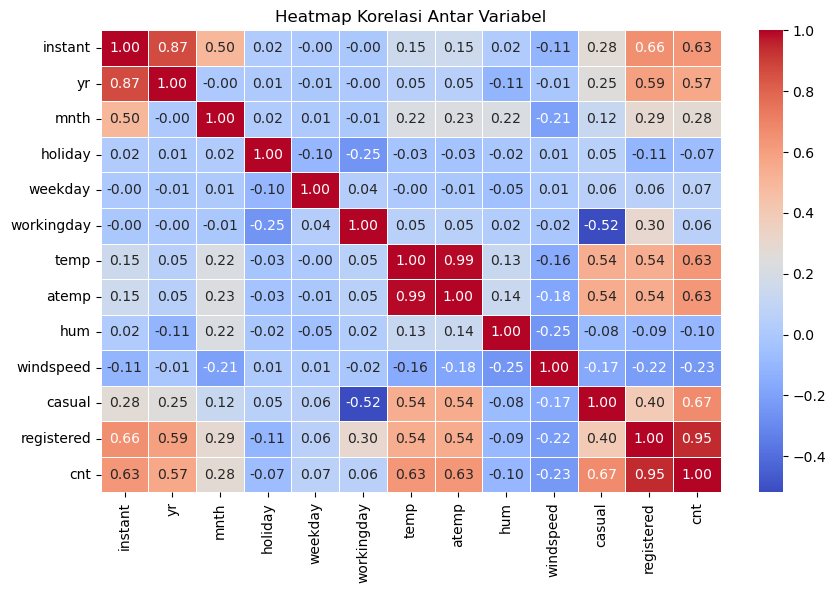

In [47]:
# Korelasi antara suhu, kelembaban, kecepatan angin, dan jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.heatmap(day_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


Penjelasan:

- Heatmap menunjukkan bahwa suhu memiliki korelasi positif yang kuat dengan jumlah peminjaman sepeda. Kelembaban dan kecepatan angin memiliki korelasi negatif yang lemah terhadap jumlah peminjaman sepeda.

 ## Conclusion

In [48]:
# Hitung total peminjaman untuk setiap musim
season_rentals = day_data.groupby('season')['cnt'].sum()
print("Total rentals per season:")
print(season_rentals)

# Hitung total peminjaman untuk setiap kondisi cuaca
weather_rentals = day_data.groupby('weathersit')['cnt'].sum()
print("Total rentals per weather condition:")
print(weather_rentals)

Total rentals per season:
season
Musim Dingin     471348
Musim Gugur      841613
Musim Panas     1061129
Musim Semi       918589
Name: cnt, dtype: int64
Total rentals per weather condition:
weathersit
Berawan         996858
Cerah          2257952
Hujan/Salju      37869
Name: cnt, dtype: int64


**Kesimpulan Analisis**

Berdasarkan analisis data penyewaan sepeda, berikut adalah kesimpulan yang dapat diambil:

1. Pola Penggunaan Sepeda Berdasarkan Waktu
- Musim panas (season 3) memiliki jumlah peminjaman sepeda tertinggi dengan total 1.061.129 peminjaman, diikuti oleh musim semi (season 2) dengan 918.589 peminjaman.
- Musim dingin (season 1) memiliki jumlah peminjaman sepeda terendah, yaitu 471.348 peminjaman.
- Jika dianalisis berdasarkan hari, jumlah peminjaman lebih tinggi pada hari kerja dibandingkan hari libur, yang menunjukkan bahwa banyak pengguna menggunakan sepeda untuk keperluan komuter.
- Pola penggunaan berdasarkan jam menunjukkan bahwa peminjaman meningkat signifikan pada pagi hari (07:00 - 09:00) dan sore hari (17:00 - 19:00), sejalan dengan jam sibuk perjalanan kerja.

2. Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda
- Cuaca cerah (weathersit 1) memiliki jumlah peminjaman sepeda tertinggi dengan total 2.257.952 peminjaman.
- Cuaca berawan (weathersit 2) menunjukkan jumlah peminjaman yang lebih rendah, yaitu 996.858 peminjaman.
- Cuaca hujan atau bersalju (weathersit 3) memiliki jumlah peminjaman paling sedikit, yaitu 37.869 peminjaman.
- Cuaca yang lebih buruk (hujan dan salju) menyebabkan penurunan signifikan dalam jumlah peminjaman sepeda.

**Rekomendasi**

- Optimalkan ketersediaan sepeda pada musim panas dan jam sibuk
  - Mengingat tingginya permintaan pada musim panas dan jam sibuk pagi/sore, pastikan jumlah sepeda yang tersedia mencukupi, terutama di lokasi dengan lalu lintas tinggi.
- Pertimbangkan faktor cuaca dalam strategi operasional
  - Karena peminjaman menurun saat cuaca buruk, perusahaan dapat menyediakan insentif seperti diskon atau promo khusus saat cuaca berawan untuk menjaga stabilitas penyewaan.

Dengan menerapkan rekomendasi ini, sistem penyewaan sepeda dapat lebih efisien dalam memenuhi permintaan pengguna dan meningkatkan pendapatan.